# Import packages

In [2]:
from growth_lib import calc_preculture_volume,project_growth
import numpy as np
import pandas
import matplotlib

%matplotlib inline

# Inoculation volume from preculture
Our goal is to calculate the volume of an exponential-phase preculture we should use to inoculate a fresh culture to target a particular OD at a particular time the next day.

### Default current time as modeling start time
If the keyword argument 'start_time' is not specified, growth_lib will use the current time.

We would like the inoculation volumes from 3 precultures with measured OD<sub>600</sub> values of 0.3435, 0.2574, and 0.4872 to target an OD<sub>600</sub> of about 0.7 at about 9:30 AM tomorrow starting with 40.0 mL fresh medium, assuming a 3.4 hr doubling time. 

Here we set these input keyword arguments: 

In [27]:
kwargs = {
    'culture_volume': 40.0, # Culture volume in mL
    'final_OD': 0.7, # Final OD value
    'end_time': '9:30 AM', # Desired time to acheive final OD
    'measured_OD': np.array([0.3435, 0.2574, 0.4872]), # Preculture ODs of 3 flasks
    'doubling_time': 3.4 # Strain doubling time
}

Now we use the calc_culture_dilution() method to calculate the amount of preculture to use to inoculate the final cultures: 

In [28]:
print calc_preculture_volume(**kwargs)

[ 5.87746853  7.8434749   4.14390484]


Hence, we need to add 0.503 mL (503 $\mu$L) to one flask containing 40 mL of fresh medium and 0.671 and 0.354 mL to the others.

### User-specified modeling start time
If we set the 'start_time' keyword argument this will be used for modeling the cell growth from this time instead of the current time.

I found that, in practice, setting this for about 20 min after measurement of the preculture usually gave me just about enough time to mix about 10 flasks and place them in the incubator.

Here's an example of the same parameters from the last example but with the start time specified:

In [30]:
kwargs = {
    'start_time': '3:40 PM', # Time to start cell culture modeling
    'culture_volume': 40.0, # Culture volume in mL
    'final_OD': 0.7, # Final OD value
    'end_time': '9:30 AM', # Desired time to acheive final OD
    'measured_OD': np.array([0.3435, 0.2574, 0.4872]), # Preculture OD
    'doubling_time': 3.4 # Strain doubling time
}

print calc_preculture_volume(**kwargs)

[ 5.88272421  7.8504886   4.14761036]


### Detailed formula

In [6]:
kwargs = {
    'start_time': '6:28 PM', # Time to start cell culture modeling
    'culture_volume': 40.0, # Culture volume in mL
    'final_OD': 0.7, # Final OD value
    'end_time': '3:30 PM', # Desired time to acheive final OD
    'measured_OD': np.array([0.3435, 0.2574, 0.4872]), # Preculture OD
    'doubling_time': 3.4, # Strain doubling time
}
print calc_preculture_volume(**kwargs)

kwargs = {
    'start_time': '6:28 PM', # Time to start cell culture modeling
    'culture_volume': 40.0, # Culture volume in mL
    'final_OD': 0.7, # Final OD value
    'end_time': '3:30 PM', # Desired time to acheive final OD
    'measured_OD': np.array([0.3435, 0.2574, 0.4872]), # Preculture OD
    'doubling_time': 3.4, # Strain doubling time
    'detailed_flag': True # Use of detailed formula
}

print calc_preculture_volume(**kwargs)

[ 1.58348683  2.11316132  1.11643622]
[ 1.64875656  2.23102435  1.14849175]


In [18]:
kwargs = {
    'start_time': '6:28 PM', # Time to start cell culture modeling
    'final_OD': 0.7, # Final OD value
    'end_time': '9:30 AM', # Desired time to acheive final OD
    'measured_OD': np.array([0.3435, 0.2574, 0.4872]), # Preculture OD
    'doubling_time': 3.4, # Strain doubling time
}

cell_concentration_series = project_growth(**kwargs)

In [8]:
OD_df = pandas.DataFrame(np.array(cell_concentration_series).T,columns=['Elapsed Time','OD'])

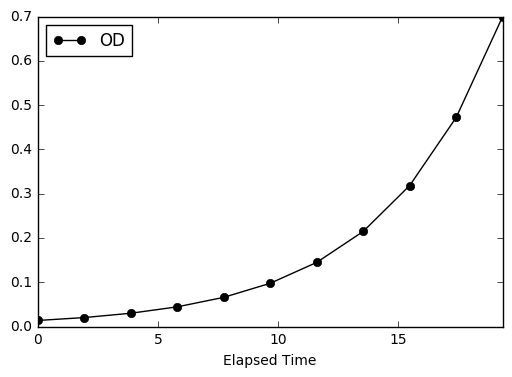

In [24]:
from matplotlib import pylab as plt

OD_df.plot(x='Elapsed Time',y='OD',style='o-',c='k')